# CS121  and CS152 - Assignment 1 

In this activity you'll download two classes of images, train a classifier to distinguish them, and analyze the results. 

##  Upload your images

Use Google images to download two classes of images into separate folders on your computer. Zip each folder.

In the file view of your paperspace machine, navigate to the data directory. Create a new folder called 'AB' where A is the name of your first class and B is the name of your second class.

Run the following code to do some setup. Replace A and B with your category names.

In [2]:
from fastai.vision import *
import zipfile
classes = ['caoShu', 'kaiShu', 'jiaGuWen', 'zhuanShu']
path = Path('data/scripts')

Now unzip the files using the following code.

In [ ]:
# for c in classes:
#     myfile = c+'.zip'
#     print(myfile)
#     with zipfile.ZipFile(path/myfile,"r") as zip_ref:
#         zip_ref.extractall(path/c)

# # don't run this step cuz Mac compresses w/ a ___Macsth folder

At this point you should have a directory data/AB/A that contains your A images and a directory data/AB/B that contains your B images. For some reason, some people found that an intermediate directory is created. For example, the A images were in data/ABC/A/A.  If this happened to you uncomment and run the following code, replace A by your category name and then repeat for B.

In [ ]:
#!mv data/AB/A/A/* data/AB/A/
#rmdir data/AB/A/A

## 4. Prune images

Use the verify_images command to eliminate any images that can't be open. Replace A, B, and c in the following code with your categories.

In [3]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

caoShu


kaiShu


liShu


zhuanShu


## 5. View data

In this section you will replicate the approach in lesson 2 to view your data.

In [32]:
import numpy
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
# # If you already cleaned your data, run this cell instead of the one above
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [4]:
data.classes

['caoShu', 'kaiShu', 'liShu', 'zhuanShu']

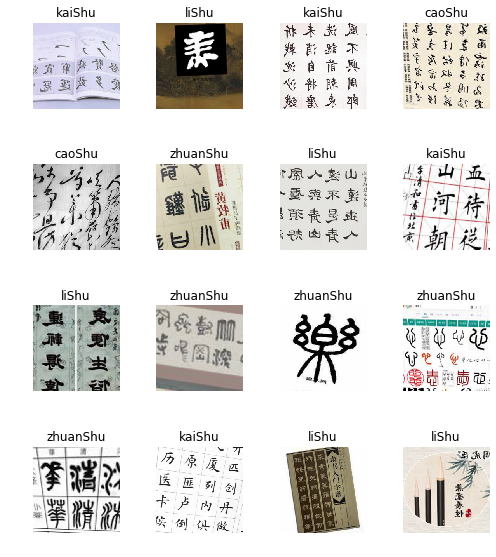

In [14]:
data.show_batch(rows=4, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['caoShu', 'kaiShu', 'liShu', 'zhuanShu'], 4, 1923, 480)

## 6.Train model

In this section you'll replicate the approach in lesson 2 to train your model.  Note the create_cnn has now been deprecated :( but it is fine to use so ignore the warning.

In [7]:
# learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.642542,0.935452,0.295833,00:17
1,1.251218,0.738756,0.256250,00:15
2,0.985504,0.633983,0.243750,00:15
3,0.810815,0.612309,0.241667,00:15


In [9]:
learn.save('stage-1')

In [10]:
learn.unfreeze()

learn.lr_find()

learn.recorder.plot()

learn.fit_one_cycle(4, max_l r=slice(1e-4,1e-3))

In [15]:
learn.save('stage-2')

## 7.Interpretation

In this section you'll replicate the approach in lesson 2 to interpret your data.

In [16]:
learn.load('stage-2');

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

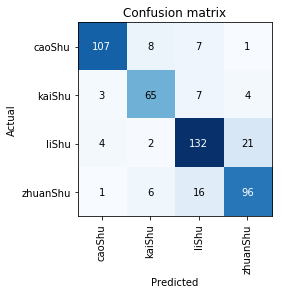

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

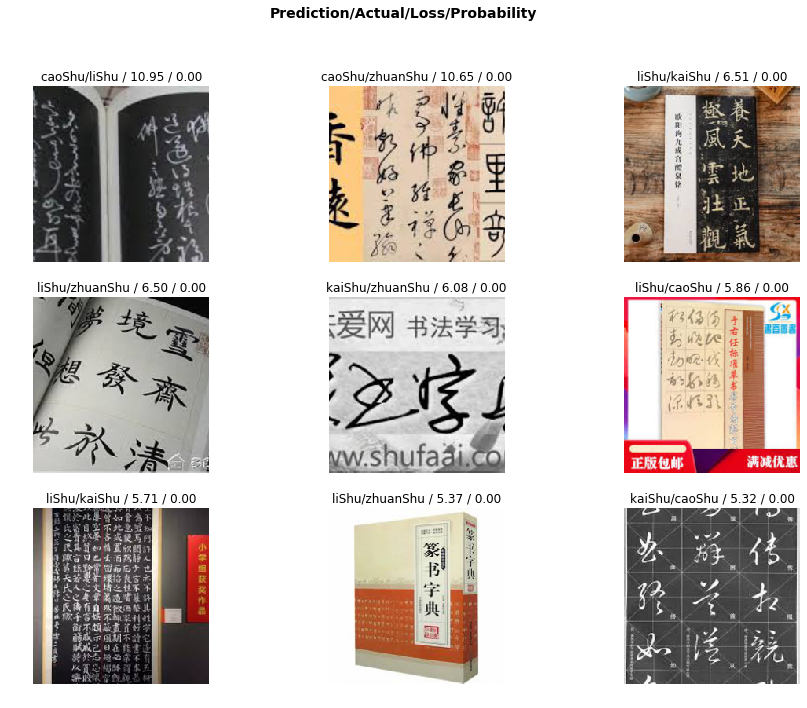

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(9, figsize=(15,11))

## Cleaning Up
